## Assignment 1

### Saumya Goel (21238562) and Diksha Srivastava (21235117)

### Part 1 and Part 2: Implement Logistic Regression and test it on validation and test set.

1. Logistic regression is a supervised classification algorithm used for categorical variables which can take only discrete values as the output such as 0/1, True/False, Yes/No, etc.  

2. Logistic regression creates a regression model by computing the probability of the given observation belonging to a particular category. It becomes a classification algorithm when a decision threshold is set making threshold value an important element.  

3. Unlike Linear Regression which uses a linear function resulting in a straight-line graph, Logistic regression uses non-linear functions such as sigmoid, tanh, ReLU and and Leaky ReLU that have slight differences in the range they cover and complexity. 

4. Logistic Regression are of 3 types: 
   a. Binomial: Two possible output values for the target variable. For e.g.: Yes/No, 0/1, Win/Loss 
   b. Multinomial: Three possible unordered output values for the target variable. For e.g.: “Disease A” vs “Disease B” vs    “Disease    C” 
   c. Ordinal: The target variable has ordered output values. For e.g.: “Good”, “Better”, “Best” or “Excellent”

5. Logistic regression has three main functions:  
   a. Hypothesis: To start building the hypothesis for the logistic regression algorithm, regression coefficients need to be introduced. Regression coefficients or weights are associated with the features which tells how important a feature is for the classification problem. The goal is to find the line that separates the two classes. We start with taking linear equation of the form: 
      ZW,b(x) = W.X + b
      
   where W is the set of weights signifying the importance of a feature, and b represents bias or intercept  
   The equation is then passed through the activation function or threshold function. The purpose of activation function is to    convert straight line equation into 0/1 values for classifier. The sigmoid function, also known as logistic function, is used for hypothesis which maps predictions to probabilities. It can be represented as  
   
   ŷ = a(X) = f(W.X+ b) = f(Z) = 1/(1+e^(-Z) )
   
   b. Cost: In order to find ŷ i.e., predictions as close as possible to y(i) i.e., actual value, loss function is defined over a single training case and then averaged over all training cases which results in average log loss. 
   
   J(W,b) = -1/N ∑_(i=1)^N▒〖(y^((i)) log⁡(y ̂^((ⅈ))+(1-y^((ⅈ)))log(1-y ̂^((ⅈ)))〗
   
   The objective is to evaluate the error and develop a model with minimum error. As J() moves towards 0, y^ tends to the correct value. On the contrary, when J() moves towards infinity, y^ tends to the wrong value. 
   
   c. Gradient Descent: Gradient descent is an optimization technique that finds the optimal coefficients and minimizes the cost function by updating parameters W and b. We are going to use stochastic gradient descent for task 1 and 3. Therefore, the equation of cost function is updated to 
   J(W,b) = -(y^((i)) log⁡(y ̂^((ⅈ))+(1-y^((ⅈ)))log(1-y ̂^((ⅈ)))

In [8]:
# Package imports
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

As instructed, the dataset is split into train, validation and test set in the ratio 70:15:15 using train_test_split() of SkLearn.

In [9]:
def read_file(filename):
    ''' Method to read files and create the dataset. 
    Some code of this part is taken from the sample 
    provided to load datasets.'''
    # Use pandas to read the CSV file as a dataframe
    df = pd.read_csv(filename)

    # The y values are those labelled 'Class': extract their values
    y = df['Class'].values

    # The x values are all other columns
    del df['Class']   # drop the 'Class' column from the dataframe
    X = df.values     # convert the remaining columns to a numpy array
    
    scaler = StandardScaler()
    scaler.fit(X)
    X_scaled = scaler.transform(X)

    # Splitting the dataset in 85:15 ratio for training set and test set.
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size= 0.15)

    # Splitting the training set such that 15% of the data is in the validation set.
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size= 0.15)

    return X, y, X_train, y_train, X_val, X_test, y_val, y_test

In [10]:
def sigmoid(z):
    ''' The sigmoid function is the activation function of Logistic Regression.'''
    return 1.0 / (1 + np.exp(-z))

def cost_func(y,y_hat):
    '''This method calculates the cost for stochastic gradient descent.'''
    cost = -(y*np.log(y_hat) + (1-y)*np.log(1-y_hat))
    return cost

In [11]:
def logistic_regression(learning_rate, max_iterations, convergence_threshold, X_train, 
                        y_train, X):
    '''This method implements Logistic Regression from scratch.'''
    
    # Initialising weights and bias with some random small initial values.
    w = np.random.normal(0, 1, size= X.shape[1])
    dw = np.zeros(X.shape[1])
    b = 0.2
    costs = []
    
    # Initialising the previous cost as 0.
    J_prev = 0
    for i in range(max_iterations):
        # Selecting randomly a training case for Stochastic Gradient Descent.
        random_indices = np.random.choice(X_train.shape[0], size=1, replace=False)
        X_SGD = X_train[random_indices, :]
        y_SGD = y_train[random_indices]
        # Calculating w.x+b and passing into activation function.
        z = np.dot(X_SGD, w) + b
        y_hat = sigmoid(z)
        # Calculating the current cost.
        J_curr = cost_func(y_SGD, y_hat)
        costs.append(J_curr) 
        # If the change in cost is minimal then convergence is reached.
        if(abs(J_curr - J_prev) < convergence_threshold):
            break
        # Gradient Descent
        for j in range(w.size):
            # Calcuating the derivative of weights (y_hat - y)* X and bias (y_hat - y).
            dw[j] = (y_hat - y_SGD[0]) * X_SGD[:,j]
        db = (y_hat - y_SGD[0])
        for j in range(w.size):
            # Updating the weights
            w[j] = w[j] - learning_rate * dw[j] 
        b = b - learning_rate * db
        # Current cost will become previous cost.
        J_prev = J_curr
    return w, b, costs

In [12]:
def predict(w, X, b):
    ''' Calculating the probability based on optimal w and b values.'''
    z = np.dot(X, w) + b
    y_hat = sigmoid(z)
    return y_hat

def accuracy(X_test, y_test, w, b):
    '''This function classifies the predicted values to 0/1 and calculates the accuracy score.'''
    y_pred = []
    # predicting the label
    for x in range(len(y_test)):
        y_pred.append(predict(w, X_test[x], b))

    # Classifying the predicted value to 0/1 based on a threshold i.e. 0.5
    for x in range(len(y_pred)):
        if y_pred[x]>=0.5:
            y_pred[x]=1
        else:
            y_pred[x]=0

    accr = accuracy_score(y_test, y_pred) * 100
    return accr

In [13]:
def validate_model(filename, X, X_train, y_train, X_val, y_val):
    ''' This method checks the optimal values of hyperparameters like learning rate.'''
    learning_rate = [0.1, 0.01, 0.001, 0.0001]
    max_iterations, convergence_threshold = 10000, 0.000001
    accuracies = []
    for lr in learning_rate:
        # Training the logistic regression model.
        w, b, costs= logistic_regression(lr, max_iterations, convergence_threshold, 
                                  X_train, 
                                  y_train, X)
        # Testing the model on validation set.
        accuracies.append(accuracy(X_val, y_val, w, b))
    accuracies_df = pd.DataFrame({'LearningRate': learning_rate, 
                                  'Accuracy': accuracies})
    print('Accuracy at different learning rates on '+ filename[:-4] + ' dataset: ')
    print(accuracies_df.sort_values(['Accuracy', 'LearningRate'], ascending= [False, False]))
    return accuracies_df.sort_values(['Accuracy', 'LearningRate'], ascending= [False, False]).iloc[0,0]

Accuracy at different learning rates on blobs300 dataset: 
   LearningRate    Accuracy
0        0.1000  100.000000
1        0.0100  100.000000
2        0.0010   94.871795
3        0.0001   74.358974


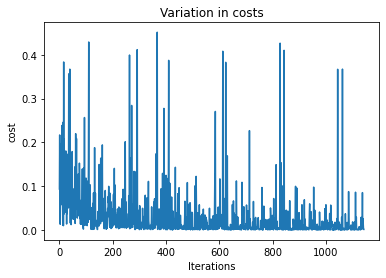

Accuracy at different learning rates on circles600 dataset: 
   LearningRate   Accuracy
1        0.0100  58.441558
3        0.0001  51.948052
2        0.0010  50.649351
0        0.1000  45.454545


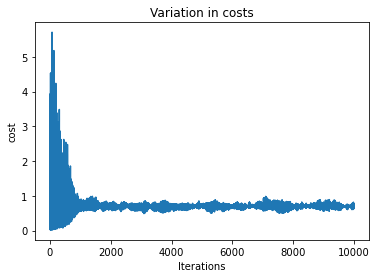

   Blobs  Circles
0  100.0     60.0


In [21]:
def model(filename):
    '''This method integrates the Logistic Regression implementation and returns 
    the accuracy of the model.'''
    # initialize hyper-parameters
    max_iterations, convergence_threshold = 10000, 0.000001
    X, y, X_train, y_train, X_val, X_test, y_val, y_test= read_file(filename)
    # Obtaining the learning rate giving maximum accuracy after validating the on the validation set.
    learning_rate = validate_model(filename, X, X_train, y_train, X_val, y_val)
    # Training the model.
    w, b, costs= logistic_regression(learning_rate, max_iterations, convergence_threshold, 
                            X_train, 
                            y_train, X)
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('Iterations')
    plt.title("Variation in costs")
    plt.show()
    # Testing the trained model.
    accr = accuracy(X_test, y_test, w, b)
    return accr

accuracies = pd.DataFrame()
accuracies = accuracies.append({'Blobs' : model('blobs300.csv'), 
                                'Circles' : model('circles600.csv')}, ignore_index = True)
print(accuracies)

##### Use of Validation set

The logistic regression model is trained on the validation set for different learning rates. The accuracy of the model is tested on the validation set. Once the accuracy for different learning rates is found then that learning rate is chosen which gave the highest accuracy. This learning rate is further used to test the accuracy on the test set.

##### Observation 

The accuracy for Blobs dataset on test set is higher than the accuracy for the Circles dataset, since Blobs dataset is linearly separable, whereas Circles dataset is not. 

It is visible from the plots shown above, the convergence is reached sooner for the blobs dataset. However, the convergence for circles dataset was never reached and it iterated for maximum number of iterations i.e. 10000.

### Part 3: Implement Shallow Neural Network

The basic overview of how neural networks operate is as follows:

a)	The input features are sent into nodes organized into hidden layers. A feature is connected to each neuron in the first hidden layer. This is true for all the input features. The outputs of the first hidden layer are connected to the next hidden layer and so on. The outputs of the last hidden layer are connected to the output layer as inputs and at output layer, we get classification values.

b)	Each input acts as a signal and each node acts as a neuron. Each signal coming in multiplied by some weight and a bias term is sent to each node as well. These signals multiplied by weights and bias are summed inside the neuron. The result of the sum goes to the activation function which limits the range of the sum of the weighted values so that it takes S-like shape.

c)	To classify non-linearly separable data, we can use neural net learning to generate the more accurate prediction. The idea is same as described in the first two points. Each node in the hidden layer is a logistic regressor. 

d)	We begin with choosing learning rate, max number of iterations, threshold for convergence, etc. Also, W and b are initialised to small random values. The number of weights to be used at each node are equal to the number of input features. 

e)	Forward Propagation: This is performed before updating the weights. The idea is to move forward in the network and calculate sum of inputs at each node and pass it through activation function to generate predictions. It is given by the formula

Zi[l] = ∑_(j = 1 to n)▒wij[l]   aj[l-1] +bi[l] 

ai[l] = f[l](Zi[l])


where f[l]() is the activation function of layer l.

f)	Backward Propagation: The error is calculated by taking the difference between predicted value and actual value. It is then propagated in the network and gradients are computed.
Output Layer:                                   

  ∆Z1[L]  =  a1[L] – y1

∆W1,i[L] = ∆Z1[L]ai[L-1]

∆b1[L] = ∆Z1[L]


Hidden Layer: Loop backwards from L-1 to 1

∆Zi[l] = f´(Zi[l])∑j(∆Zj[l+1] Wj,i[l+1])

∆Wj,i[l] = ∆Zj[l]ai[l-1]

∆bj[l] = ∆Zj[l]


g)	Update W and b to minimize cost

Wj,i[l] - = α∆Wji[l]
bj[l] - = α∆bj[l]


In [22]:
def initialize(nodes, features):
    '''Initializing the weights and bias with small random values.
    The dimension of weights when propagating to first hidden layer is nodes * features.
    The dimension of weights when propagating from hidden layer to output layer is 1 * nodes.'''
    parameters = {}
    # If nodes are 3 and features are 4 then W1 will have dimension 3 * 4.
    parameters['W1'] = np.random.normal(0, 1, size = (nodes, features))
    parameters['B1'] = np.random.normal(0, 1, size = (nodes,1)) 
    parameters['W2'] = np.random.normal(0, 1, size = (1, nodes))
    parameters['B2'] = np.random.normal(0, 1, size = (1,1))
    return parameters

In [23]:
def forward_propagation(X, parameters):
    '''This method implements forward propagation for neural network with one hidden layer.
    This method is responsible for calculating Z value which is w1*x1 + w2*x2 + b and passing 
    this to activation function to get the y_hat value at each node of each layer.'''
    forward_values = {}
    w1 = parameters['W1']
    b1 = parameters['B1']
    w2 = parameters['W2']
    b2 = parameters['B2']

    # Calculating the z value and y_hat value at each layer.
    z1 = np.dot(w1, X) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(w2, a1) + b2
    a2 = sigmoid(z2)
    forward_values = {
      'Z1' : z1,
      'A1' : a1,
      'Z2' : z2,
      'A2' : a2
    }
    return forward_values

In [24]:
def backward_propagation(parameters, forward_values, X, y):
    '''This method implements backward propagation of newral network with one hidden layer.
    This method calculates the derivatives of weight and bias for each node and each layer.'''
    backward_values = {}
    w1 = parameters['W1']
    a1 = forward_values['A1']
    w2 = parameters['W2']
    a2 = forward_values['A2']

    # Back propagating to get the derivatives of weight and bias at each node and layer.
    dz2 = a2 - y
    dw2 = np.dot(dz2, a1.T)
    db2 = np.sum(dz2, axis=1, keepdims=True)
    dz1 = np.multiply(np.dot(w2.T, dz2) , (a1 - np.power(a1, 2)))
    dw1 = np.dot(dz1, X)
    db1 = np.sum(dz1, axis=1, keepdims=True)
    backward_values = {
      'DW1' : dw1,
      'DW2' : dw2,
      'DB1' : db1,
      'DB2' : db2
    }
    return backward_values

In [25]:
def update_weights(parameters, backward_values, learning_rate):
    '''This method updates the weight and bias values to get their optimal values.'''
    parameters_updated = {}
    # Fetching the old weights and bias.
    w1 = parameters['W1']
    b1 = parameters['B1']
    w2 = parameters['W2']
    b2 = parameters['B2']

    # Fetching the derivatives calculated at back propagation step.
    dw1 = backward_values['DW1']
    dw2 = backward_values['DW2']
    db1 = backward_values['DB1']
    db2 = backward_values['DB2']

    # Updating weights and bias.
    w1 = w1 - learning_rate * dw1
    w2 = w2 - learning_rate * dw2
    b1 = b1 - learning_rate * db1
    b2 = b2 - learning_rate * db2

    parameters_updated = {
      'W1' : w1,
      'W2' : w2,
      'B1' : b1,
      'B2' : b2
    }
    return parameters_updated

In [26]:
def model(X_train, y_train, num_iterations, learning_rate):
    '''This method integrates the shallow neural network steps and returns the optimal parameters obtained.'''
    # Initialize weights and bias
    parameters = initialize(3, X_train.shape[1])
    costs = []
    J_prev = 0

    # Iterating for maximum number of iterations.
    for i in range(num_iterations):
        # Selecting a random row from training set.
        random_indices = np.random.choice(X_train.shape[0], size=1, replace=False)
        # Obtaining one training example for stochastic gradient descent.
        X_SGD = X_train[random_indices, :]
        y_SGD = y_train[random_indices]

        # Forward Propagation
        forward_values = forward_propagation(X_SGD.T, parameters)

        # Cost function
        current_cost = cost_func(y_SGD, forward_values['A2'])
        costs.append(current_cost[0])
        if(abs(current_cost - J_prev) < 0.000001):
            break

        # Backward propagation
        backward_values = backward_propagation(parameters, forward_values, X_SGD, y_SGD)

        # Update parameters
        parameters = update_weights(parameters, backward_values, learning_rate)
        J_prev = current_cost

    return parameters, costs

In [27]:
def accuracy_NN(X_test, y_test, parameters, y_hat):
    '''This method converts the y_hat to binary form based on a threshold value i.e. 0.5
    and calculates the accuracy of the model.'''
    
    # Forward propagating with optimal weights and bias.
    values_test = forward_propagation(X_test.T, parameters)
    # Obtaining the y_hat value of output layer.
    y_pred = values_test[y_hat]
    # Since y_pred returns a list of 1 row and multiple columns, we
    y_pred_new = y_pred[0]
    for x in range(len(y_pred_new)):
        # Doing binary classification based on a threshold value (0.5).
        if y_pred_new[x]>=0.5:
            y_pred_new[x]=1
        else:
            y_pred_new[x]=0
    accr = accuracy_score(y_test, y_pred_new) * 100
    return accr


blobs300


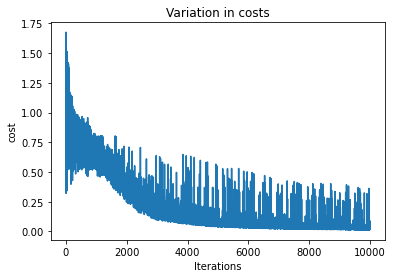

circles600


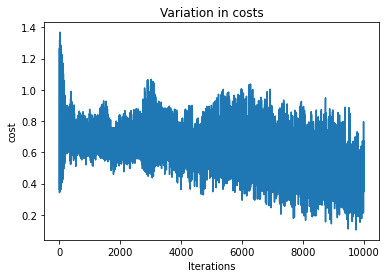

   Blobs    Circles
0  100.0  94.444444


In [822]:
import warnings
warnings.filterwarnings("ignore")
def shallow_NN(filename):
    '''This method creates the dataset, trains the model and obtains the accuracy of the model.'''
    X, y, X_train, y_train, X_val, X_test, y_val, y_test= read_file(filename)
    parameters, costs = model(X_train, y_train, 10000, 0.01)
    print(filename[:-4])
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('Iterations')
    plt.title("Variation in costs")
    plt.show()
    accr = accuracy_NN(X_test, y_test, parameters, 'A2')
    return accr

accuracies = pd.DataFrame()
accuracies = accuracies.append({'Blobs' : shallow_NN('blobs300.csv'), 
                                'Circles' : shallow_NN('circles600.csv')}, ignore_index = True)
print(accuracies)


##### Observation 

As expected, shallow neural network gave better accuracy on circles dataset than part 1. This owes to the presence of multiple logistic regressors in the neural network which allows generation of multiple boundaries (depending on the number of regressors in the network).


### Part 4: CIFAR10 Dataset

In [28]:
def unpickle(file):
    '''This function is taken from the assignment notes to open a pickled
    file and return a dictionary of data and labels.'''
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

def loadbatch(batchname):
    '''This function loads the batch files from a folder. This function is also 
    taken from assignment notes.'''
    folder = 'cifar-10-batches-py'
    batch = unpickle(folder+"/"+batchname)
    return batch

def loadlabelnames():
    '''This function is taken from assignment notes and loads the label name
    from a batch file.'''
    folder = 'cifar-10-batches-py'
    meta = unpickle(folder+"/"+'batches.meta')
    return meta[b'label_names']

In [29]:
def load_data(): 
    '''This function loads the batch 1 data and fetches the deer and ship data to create X and y.'''
    batch1 = loadbatch('data_batch_1')
    data = batch1[b'data']
    labels = batch1[b'labels']
    names = loadlabelnames()
    # Fetching only the red channel from the dataset.
    channel = data[:,:1024]
    batch_labels = np.array([labels]).T
    labelled_data = np.append(channel,batch_labels,axis=1)
    # Deer and ship data are at index 4 and 8.
    deer= labelled_data[labelled_data[:,-1] == 4]
    ship = labelled_data[labelled_data[:,-1] == 8]
    y = np.concatenate((deer,ship),axis=0)

    # Obtaining the class value of deer and ship and converting it to binary form.
    Y = y[:,[-1]]
    Y[Y==4] = 0
    Y[Y==8] = 1

    # Creating the feature array X.
    X = np.delete(y,-1,1)
    # Dividing the dataset in 70:15:15 ratio for training, validation and test set.
    X_train_cifar, X_test_cifar, Y_train_cifar, Y_test_cifar = train_test_split(X, Y, 
                                               test_size=0.15)
    # Validation set
    X_train_cifar, X_val_cifar, Y_train_cifar, Y_val_cifar = train_test_split(X_train_cifar,
                                                                              Y_train_cifar, test_size= 0.15)

    # Normalising the data as the data in the input vector varies between 0 to 255.
    # Normalising them near 0/1 value will help speed up the training. 
    # Since stochastic gradient descent is used, it will prevent getting stuck in local optima.
    X_train_cifar = X_train_cifar/255
    X_test_cifar = X_test_cifar/255
    X_val_cifar = X_val_cifar/255
    return X_train_cifar, X_test_cifar, Y_train_cifar, Y_test_cifar, X_val_cifar, Y_val_cifar

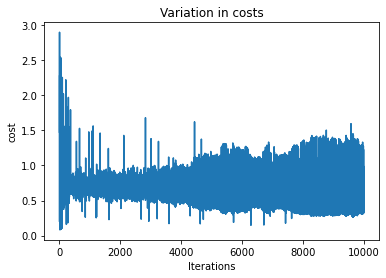

Accuracy of shallow Neural Network on CIFAR data:  69.73684210526315


In [873]:
def cifar():
    '''This method creates the dataset, trains the model and obtains the accuracy of the model.'''
    X_train_cifar, X_test_cifar, Y_train_cifar, Y_test_cifar,X_val_cifar, Y_val_cifar= load_data()
    # Using a learning rate of 0.01
    parameters, costs = model(X_train_cifar, Y_train_cifar, 10000, 0.01)
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('Iterations')
    plt.title("Variation in costs")
    plt.show()
    accr = accuracy_NN(X_test_cifar, Y_test_cifar, parameters, 'A2')
    return accr

print('Accuracy of shallow Neural Network on CIFAR data: ', str(cifar()))

##### Observations

With stochastic gradient descent and one color channel, we have achieved an accuracy of 70% which is quite good, given, the data is unstructured and we have used only one hidden layer with three nodes.

### Part 5: Deep Learning Enhancements

### Section 1: Supporting arbitrary layers 
#### Author: Diksha Srivastava (21235117)

I have done the following enhancements:

1. I have made the code generic to support an arbitrary number of layers. In order to generalise, I have done the following steps:

   a. I have taken as input layer_size and nodes. For a neural network with 2 hidden layers, layer_size = 4 (1 input layer, 2 hidden layers, 1 output layer), nodes = 3 means that each hidden layer will have 3 nodes. 

   b. I have initialised the weights and bias based on the number of layers and nodes. So for layer_size = 4, nodes = 3, W1, W2, W3 weights will be created with dimensions (3, 4 (input features)), (3, 3), (1, 3) respectively. The bias B1, B2, B3 will have dimension (3, 1), (3, 1), (1, 1) respectively.

   c. The forward and backward propagation will be performed in a loop based on layer_size and the optimal weights and bias will be calculated.

2. The second enhancement, I have done is L2 regularization.
   Regularization is a technique to prevent overfitting by fitting the function on the given training set appropriately. In order to penalise more complex networks, a penalty term is added to the cost function. Regularization tends to make weights close to 0. The regularization parameter λ signifies how important the penalty is to the overall cost. The cost function is updated as follows:

JW,b( y,ŷ) = 1/N ∑(i=1 to N)〖L(y,ŷ)〗 + λ/2N||W||(2,2)

∆Wj,i[l] = ∆Zj[l] ai[l-1] +  (λ/N)Wj,i[l]

Wj,i[l] - = α∆Wj,i[l] - Wj,i[l]


In [30]:
def initialize_layers(layers, layer_size, X, nodes):
    '''This function initialise the weights and bias with some random initial values.'''
    # Creating the size of matrix for each layer.
    # Like if there are two hidden layers with 3 nodes L0: [4, 3], 
    # L1: [3,3], L2: [3,1]. These dimension will be used to initialise weights and bias matrix.
    for i in range(layer_size-1):
        if i==0:
            layers['L' + str(i)] = [X.shape[1], nodes]
        elif i==layer_size-2:
            layers['L' + str(i)] = [nodes, 1]
        else:
            layers['L' + str(i)] = [nodes, nodes]
    parameters = {}
    i = 1
    # Initialising weights based on number of layers.
    for key, value in layers.items():
        # value[1] is the to_nodes size and value[0] is the from_nodes size.
        # A matrix of weights is created such that it's dimension is nodes * features.
        # If there are 3 nodes in hidden layer and 4 features then weight will have
        # dimension 3 * 4
        parameters['W' + str(i)] = np.random.normal(0, 1, size = (value[1], value[0]))
        parameters['B' + str(i)] = np.random.normal(0, 1, size = (value[1],1)) 
        i = i+1
        
    return parameters

In [31]:
def forward_propagation_layers(X, parameters, layer_size):
    '''This function does forward propagation. It calculates the value of z and a (activation function)
    at each node in each layer.'''
    forward_values = {}
    # Setting the z value and a value for each layer.
    for i in range(1, layer_size):
        # If the layer is 1 then the dot product is between w1, X else w2, a1.
        if i == 1:
            # Parameters have W and B values for each layer.
            forward_values['Z' + str(i)] = np.dot(parameters['W' + str(i)], X) + parameters['B' + str(i)]
        else:
            # Forward values have Z and A value for each layer.
            forward_values['Z' + str(i)] = np.dot(parameters['W' + str(i)], 
                                                  forward_values['A' + str(i-1)]) + parameters['B' + str(i)]
        # Calculating the activation function for each layer.
        forward_values['A' + str(i)] = sigmoid(forward_values['Z' + str(i)])
    return forward_values

In [32]:
def backward_propagation_layers(parameters, forward_values, X, y, layer_size):
    '''This function back propagates. It calculates the value of derivates of weights and bias
    on each node at each layer.'''
    backward_values = {}
    
    # Calculating DZ, DW, and DB value for the output layer. For 2 hidden layers, the following will be calculated.
    #     dz3 = a3 - y
    #     dw3 = np.dot(dz3, a2.T)
    #     db3 = np.sum(dz3, axis=1, keepdims=True)
    backward_values['DZ' + str(layer_size - 1)] = forward_values['A' + str(layer_size - 1)] - y
    backward_values['DW' + str(layer_size - 1)] = np.dot(backward_values['DZ' + str(layer_size - 1)], 
                                                        forward_values['A' + str(layer_size - 2)].T)
    backward_values['DB' + str(layer_size - 1)] = np.sum(backward_values['DZ' + str(layer_size - 1)],
                                                        axis = 1, keepdims = True)
    
    # Propagating backwards to get the derivatives of weights and bias.
    #     For Hidden Layer 2, the following will be calculated.
    #     dz2 = np.multiply(np.dot(w3.T, dz3) , (a2 - np.power(a2, 2)))
    #     dw2 = np.dot(dz2, a1.T)
    #     db2 = np.sum(dz2, axis=1, keepdims=True)
    for i in range(layer_size - 2, 0, -1):
        backward_values['DZ' + str(i)] = np.multiply(np.dot(parameters['W' + str(i+1)].T,
                                                            backward_values['DZ' + str(i+1)]),
                                                    (forward_values['A' + str(i)] - np.power(
                                                    forward_values['A' + str(i)], 2)))
        #     For Hidden Layer 1, dw1 will be calculated as a dot product of dz1 and X.
        #     dz1 = np.multiply(np.dot(w2.T, dz2) , (a1 - np.power(a1, 2)))
        #     dw1 = np.dot(dz1, X)
        #     db1 = np.sum(dz1, axis=1, keepdims=True)
        if i==1:
            backward_values['DW' + str(i)] = np.dot(backward_values['DZ' + str(i)], X)
        else:
            backward_values['DW' + str(i)] = np.dot(backward_values['DZ' + str(i)], forward_values['A' + str(i-1)].T)
        backward_values['DB' + str(i)] = np.sum(backward_values['DZ' + str(i)], axis = 1, keepdims = True)
    return backward_values

In [33]:
def update_weights_layers(parameters, backward_values, learning_rate, layer_size):
    '''This function updates the weights and bias at each node and layer.'''
    parameters_updated = {}
    
    # For 2 hidden layers, the following will be calculated.
    #     w1 = w1 - learning_rate * dw1
    #     w2 = w2 - learning_rate * dw2
    #     w3 = w3 - learning_rate * dw3
    #     b1 = b1 - learning_rate * db1
    #     b2 = b2 - learning_rate * db2
    #     b3 = b3 - learning_rate * db3
    # Parameters contain old W and B values. Backward values contain the derivatives of DW and DB values.
    for i in range(1, layer_size):
        parameters_updated['W' + str(i)] = parameters['W' + str(i)] - learning_rate * backward_values['DW' + str(i)]
        parameters_updated['B' + str(i)] = parameters['B' + str(i)] - learning_rate * backward_values['DB' + str(i)]
    return parameters_updated

In [67]:
def model_layer(X_train, y_train, num_iterations, learning_rate, layer_size, nodes):
    '''This function integrates the arbitrary neural network and returns the optimal weights and bias. '''
    # Layer dictionary helps in initialising the weights and bias matrix dimesion. 
    # It contains three layers with a list having the size of from_nodes, to_nodes respectively.
    layers = {}
    costs = []
    J_prev = 0
    # Initialize weights and bias
    parameters = initialize_layers(layers, layer_size, X_train, nodes)
    
    for i in range(num_iterations):
        # Selecting a random row from training set to implement stochastic gradient descent.
        random_indices = np.random.choice(X_train.shape[0], size=1, replace=False)
        X_SGD = X_train[random_indices, :]
        y_SGD = y_train[random_indices]
        
        # Forward Propagation
        forward_values = forward_propagation_layers(X_SGD.T, parameters, layer_size)
        
        # Cost function
        current_cost = cost_func(y_SGD, forward_values['A' + str(layer_size-1)])
        costs.append(current_cost[0])
        if(abs(current_cost - J_prev) < 0.000001):
            break
        
        # Backward propagation
        backward_values = backward_propagation_layers(parameters, forward_values, X_SGD, y_SGD, layer_size)
        
        # Update parameters
        parameters = update_weights_layers(parameters, backward_values, learning_rate, layer_size)
        J_prev = current_cost
    return parameters, costs

In [41]:
def accuracy_deepNN(X_test, y_test, parameters, layer_size):
    '''This method converts the y_hat to binary form based on a threshold value i.e. 0.5
    and calculates the accuracy of the model.'''
    
    # Forward propagating with optimal weights and bias.
    values_test = forward_propagation_layers(X_test.T, parameters, layer_size)
    # Obtaining the y_hat value of output layer.
    y_pred = values_test['A' + str(layer_size-1)]
    # Since y_pred returns a list of 1 row and multiple columns, we
    y_pred_new = y_pred[0]
    for x in range(len(y_pred_new)):
        # Doing binary classification based on a threshold value (0.5).
        if y_pred_new[x]>=0.5:
            y_pred_new[x]=1
        else:
            y_pred_new[x]=0
    accr = accuracy_score(y_test, y_pred_new) * 100
    return accr

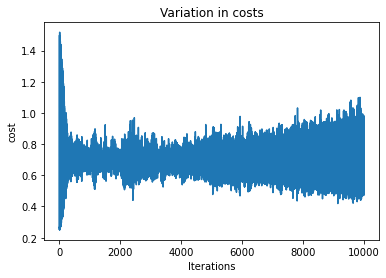

Accuracy of Deep Neural Network on CIFAR data:  75.0


In [62]:
def deep_NN():
    '''This method creates the dataset, trains the model and obtains the accuracy of the model.'''
    X_train_cifar, X_test_cifar, Y_train_cifar, Y_test_cifar, X_val_cifar, Y_val_cifar= load_data()
    layer_size = 4
    nodes = 3
    parameters, costs = model_layer(X_train_cifar, Y_train_cifar, 10000, 0.01, layer_size, nodes)
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('Iterations')
    plt.title("Variation in costs")
    plt.show()
    accr = accuracy_deepNN(X_test_cifar, Y_test_cifar, parameters, layer_size)
    return accr

print('Accuracy of Deep Neural Network on CIFAR data: ', str(deep_NN()))

##### Observations
When training the deep neural network on 2 hidden layers and 3 nodes in each layer, we have obtained an accuracy of 75%. It is better than what we got in shallow neural network as it only supported one hidden layer. 

### Enhancement 1: L2 Regularization

In [63]:
def cost_func_regularization(reg_rate, y_hat, y, N, parameters, layer_size):
    '''This function implements the cost function with a regularization factor to avoid overfitting.'''
    weights_sum = 0
    # Calculating the regularization factor
    for i in range(1, layer_size):
        weights_sum = weights_sum + np.sum(np.square(parameters['W' + str(i)]))
    regularized_factor = (reg_rate / 2*N) * weights_sum
    # Adding the regularized factor/penalty term to the cost.
    cost = -1/ N * ((y*np.log(y_hat) + (1-y)*np.log(1-y_hat))) + regularized_factor
    return cost

In [64]:
def backward_propagation_regularized(reg_rate, parameters, forward_values, X, y, layers, N, layer_size):
    '''This function back propagates. It calculates the value of derivates of weights and bias
    on each node at each layer.'''
    backward_values = {}
    
    # Output layer
    # If there are 2 hidden layers, then the following values will be generated.
    #     dz3 = a3 - y
    #     dw3 = np.dot(dz3, a2.T) + (reg_rate/N) * w3
    #     db3 = np.sum(dz3, axis=1, keepdims=True)
    backward_values['DZ' + str(layer_size - 1)] = forward_values['A' + str(layer_size - 1)] - y
    # Adding the penalty term for higher weights also known as weight decay.
    backward_values['DW' + str(layer_size - 1)] = np.dot(backward_values['DZ' + str(layer_size - 1)], 
                                                        forward_values[
                                                            'A' + str(layer_size - 2)].T) + (reg_rate/N) *  parameters[
        'W' + str(layer_size-1)]
    backward_values['DB' + str(layer_size - 1)] = np.sum(backward_values['DZ' + str(layer_size - 1)],
                                                        axis = 1, keepdims = True)

    # For hidden layers, following values will be generated.
    #     dz2 = np.multiply(np.dot(w3.T, dz3) , (a2 - np.power(a2, 2)))
    #     dw2 = np.dot(dz2, a1.T) + (reg_rate/N) * w2
    #     db2 = np.sum(dz2, axis=1, keepdims=True)
    for i in range(layer_size - 2, 0, -1):
        backward_values['DZ' + str(i)] = np.multiply(np.dot(parameters['W' + str(i+1)].T,
                                                            backward_values['DZ' + str(i+1)]),
                                                    (forward_values['A' + str(i)] - np.power(
                                                    forward_values['A' + str(i)], 2)))
        # Adding the penalty term for higher weights also known as weight decay.
        if i==1:
            backward_values['DW' + str(i)] = np.dot(backward_values['DZ' + str(i)], 
                                                    X) + (reg_rate/N) *  parameters['W' + str(i)]
        else:
            backward_values['DW' + str(i)] = np.dot(backward_values['DZ' + str(i)],
                                                    forward_values['A' + str(i-1)].T) + (reg_rate/N) *  parameters[
                'W' + str(i)]
        backward_values['DB' + str(i)] = np.sum(backward_values['DZ' + str(i)], axis = 1, keepdims = True)
    
    return backward_values

In [65]:
def update_weights_regularized(reg_rate, parameters, backward_values, learning_rate, N, layer_size):
    '''This function updates the weights and bias at each node and layer.'''
    parameters_updated = {}
    
    # Updating weights by reducing the weight with lambda/2N * w value.
    for i in range(1, layer_size):
        parameters_updated['W' + str(i)] = parameters['W' + str(i)] - learning_rate * backward_values[
            'DW' + str(i)] - (learning_rate * reg_rate/N) * parameters['W' + str(i)]
        parameters_updated['B' + str(i)] = parameters['B' + str(i)] - learning_rate * backward_values['DB' + str(i)]
        
    return parameters_updated

In [68]:
def model_regularized(X_train, y_train, num_iterations, learning_rate, layer_size, nodes):
    '''This function integrates the arbitrary neural network and returns the optimal weights and bias. '''
    # Layer dictionary helps in initialising the weights and bias matrix dimesion. 
    # It contains three layers with a list having the size of from_nodes, to_nodes respectively.
    layers = {}
    costs = []
    J_prev = 0
    # Initialize weights and bias
    parameters = initialize_layers(layers, layer_size, X_train, nodes)
    # Lambda value of regularization.
    reg_rate = 0.001
    
    for i in range(num_iterations):
        # Selecting a random row from training set for stochastic gradient descent.
        random_indices = np.random.choice(X_train.shape[0], size=1, replace=False)
        X_SGD = X_train[random_indices, :]
        y_SGD = y_train[random_indices]
        
        # Forward Propagation
        forward_values = forward_propagation_layers(X_SGD.T, parameters, layer_size)
        
        # Cost function
        current_cost = cost_func_regularization(reg_rate, forward_values['A3'], y_SGD,
                                                X_SGD.shape[0] , parameters, layer_size)
        costs.append(current_cost[0])
        if(abs(current_cost - J_prev) < 0.000001):
            break
        
        # Backward propagation
        backward_values = backward_propagation_regularized(reg_rate, parameters, forward_values, X_SGD, y_SGD, len(layers),
                                                          X_SGD.shape[0], layer_size)
        
        # Update parameters
        parameters = update_weights_regularized(reg_rate, parameters, backward_values, learning_rate, X_SGD.shape[0],
                                                layer_size)
        J_prev = current_cost
    return parameters, costs


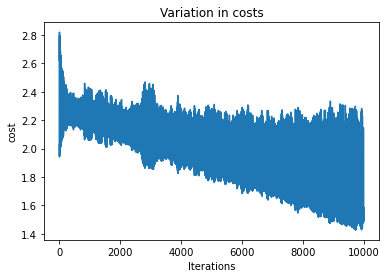

Accuracy of Regularized Deep Neural Network on CIFAR data:  72.03947368421053


In [87]:
def deep_NN_regularized():
    '''This method creates the dataset, trains the model and obtains the accuracy of the model.'''
    X_train_cifar, X_test_cifar, Y_train_cifar, Y_test_cifar, X_val_cifar, Y_val_cifar= load_data()
    layer_size = 4
    nodes = 3
    parameters, costs = model_regularized(X_train_cifar, Y_train_cifar, 10000, 0.01, layer_size, nodes)
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('Iterations')
    plt.title("Variation in costs")
    plt.show()
    accr = accuracy_deepNN(X_test_cifar, Y_test_cifar, parameters, layer_size)
    return accr

print('Accuracy of Regularized Deep Neural Network on CIFAR data: ', str(deep_NN_regularized()))

##### Observations
After performing regularization, the accuracy decreased slightly as regularization adds penalty to higher weights.

### Section 2: Support Arbitrary layers

#### Saumya Goel (21238562)

As suggested, the algorithm is modified to include as many layers as required. Currently, it is working for 2 hidden layers and 3 nodes per layer. It can be extended just by adding values to layers[].

In [96]:
def initialize_layers(layers):
    '''Initializing the weights and bias with small random values.
    The dimension of weights when propagating to first hidden layer is nodes * features.
    The dimension of weights when propagating from hidden layer to output layer is 1 * nodes.'''
    parameters = {}

    for i in range(1,len(layers)):
      parameters['W'+ str(i)] = np.random.normal(0, 1, size = (layers[i], layers[i-1]))
      parameters['B'+ str(i)] = np.random.normal(0, 1, size = (layers[i],1))

    return parameters

def forward_propagation_layers(X, parameters):
    '''This function does forward propagation. It calculates the value of z and a (activation function)
    at each node in each layer.'''
    forward_values = {}
    for i in range(1,(len(parameters)//2)+1):
      if i == 1:
        forward_values['Z' + str(i)] = np.dot(parameters['W' + str(i)],X) + parameters['B' + str(i)]
        forward_values['A' + str(i)] = sigmoid(forward_values['Z' + str(i)])

      else:
        forward_values['Z' + str(i)] = np.dot(parameters['W' + str(i)], forward_values['A' + str(i-1)]) + parameters['B' + str(i)]
        forward_values['A' + str(i)] = sigmoid(forward_values['Z' + str(i)])

    return forward_values

def backward_propagation_layers(parameters, forward_values, X, y):
    '''This function back propagates. It calculates the value of derivates of weights and bias
    on each node at each layer.'''
    backward_values = {}

    # Obtaining the values of w (weights) and a (activation function).

    for i in range(len(parameters)//2,0,-1):
    
      # Output layer
      if i == len(parameters)/2:
        dz = forward_values['A' + str(i)] - y
        backward_values['dw' + str(i)] = np.dot(dz, forward_values['A' + str(i-1)].T)
        backward_values['db' + str(i)] = np.sum(forward_values['A' + str(i)] - y, axis=1, keepdims=True)

      # Hidden Layer
      else:
        dzl = dz
        dz = np.multiply(np.dot(parameters['W' + str(i+1)].T, dzl), 
                                                      (forward_values['A' + str(i)] - np.power(forward_values['A' + str(i)],2)) )
        if i == 1:        
          backward_values['dw' + str(i)] = np.dot(dz, X)
          backward_values['db' + str(i)] = np.sum(dz , axis=1, keepdims=True)  
        else:
          backward_values['dw' + str(i)] = np.dot(dz, forward_values['A' + str(i-1)].T)
          backward_values['db' + str(i)] = np.sum(dz , axis=1, keepdims=True)  

    return backward_values

def update_weights_layers(parameters, backward_values, learning_rate):
    '''This function updates the weights and bias at each node and layer.'''
    parameters_updated = {} 

    # Updating weights.
    for i in range(1,(len(parameters)//2)+1):
      parameters_updated['W' + str(i)] = parameters['W' + str(i)] - learning_rate * backward_values['dw' + str(i)]
      parameters_updated['B' + str(i)] = parameters['B' + str(i)] - learning_rate * backward_values['db' + str(i)]

    return parameters_updated

In [98]:
def model_layer(X_train, y_train,layers, num_iterations, learning_rate, convergence_threshold):
    '''This method integrates the shallow neural network steps and returns the optimal parameters obtained.'''
    # Initialize weights and bias
    parameters = initialize_layers(layers)
    costs = []
    J_prev = 0
    # Iterating for maximum number of iterations.
    for i in range(num_iterations):
        # Selecting a random row from training set.
        random_indices = np.random.choice(X_train.shape[0], size=1, replace=False)
        # Obtaining one training example for stochastic gradient descent.
        X_SGD = X_train[random_indices, :]
        y_SGD = y_train[random_indices]

        # Forward Propagation
        forward_values = forward_propagation_layers(X_SGD.T, parameters)

        # Cost function
        current_cost = cost_func(forward_values['A' + str(len(layers)-1)], y_SGD)
        
        if(abs(J_prev - current_cost) < convergence_threshold):
         break
        
        costs.append(current_cost[0])

        # Backward propagation
        backward_values = backward_propagation_layers(parameters, forward_values, X_SGD, y_SGD)

        # Update parameters
        parameters = update_weights_layers(parameters, backward_values, learning_rate)
        
    J_prev = current_cost

    return parameters, costs

In [99]:
def accuracy_NN(X_test, y_test, parameters, y_hat):
    '''This method converts the y_hat to binary form based on a threshold value i.e. 0.5
    and calculates the accuracy of the model.'''
    
    # Forward propagating with optimal weights and bias.
    values_test = forward_propagation_layers(X_test.T, parameters)
    # Obtaining the y_hat value of output layer.
    y_pred = values_test[y_hat]
    # Since y_pred returns a list of 1 row and multiple columns, we
    y_pred_new = y_pred[0]
    for x in range(len(y_pred_new)):
        # Doing binary classification based on a threshold value (0.5).
        if y_pred_new[x]>=0.5:
            y_pred_new[x]=1
        else:
            y_pred_new[x]=0
    accr = accuracy_score(y_test, y_pred_new) * 100
    return accr

In [104]:
import warnings
warnings.filterwarnings("ignore")
def deep_NN():
    '''This method creates the dataset, trains the model and obtains the accuracy of the model.'''
    X_train_cifar, X_test_cifar, Y_train_cifar, Y_test_cifar, X_val_cifar, Y_val_cifar= load_data()
    #Number of layers and nodes are defined here. length of layer is the total number of layers in the network and 
    #values in the layer list are the number of nodes
    layers = [X_train_cifar.shape[1], 3, 3, 1]
    #identifies output layer
    output_pred = 'A' + str(len(layers)-1)
    parameters, costs = model_layer(X_train_cifar, Y_train_cifar,layers, 10000, 0.01, 0.000001)
    # plot the cost
#     plt.plot(costs)
#     plt.ylabel('cost')
#     plt.xlabel('Iterations')
#     plt.title("Variation in costs")
#     plt.show()
    accr = accuracy_NN(X_test_cifar, Y_test_cifar, parameters, output_pred)
    return accr

print('Accuracy of Deep Neural Network on CIFAR data: ', str(deep_NN()))

Accuracy of Deep Neural Network on CIFAR data:  72.69736842105263


### Enhancement 2 : Backprop with momentum

Backpropagation with momentum is one of the optimization algorithms which is used for following reasons:

1. Every parameter should be updated on its own rate instead of being updated by learning parameter only.
2. Helps accelerate gradients vectors in the right directions
3. Faster convergence
4. It works well with stochastic gradient descent
5. It helps in reducing noise
6. It is simple as it calculates only one extra value

In [105]:
def initialize_layers(layers):
    '''Initializing the weights and bias with small random values.
    The weights are of the shape no. of to_nodes * no, of from_nodes.
    The biases are of the shape no. of to_nodes * 1.'''
    parameters = {}
    
    #generates weights and biases depending on the number of layers
    for i in range(1,len(layers)):
        parameters['W'+ str(i)] = np.random.normal(0, 1, size = (layers[i], layers[i-1]))
        parameters['B'+ str(i)] = np.random.normal(0, 1, size = (layers[i],1))

    return parameters

def forward_propagation_layers(X, parameters):
    '''Forward propagation step which calculates the value of z and sends it to a (activation function)
    at each node in each layer.'''
    forward_values = {}
    for i in range(1,(len(parameters)//2)+1):
        
      '''at first layer, input features are multiplied with the weights which are them summed 
       along with bias and sent to activation function.'''
      if i == 1:
        forward_values['Z' + str(i)] = np.dot(parameters['W' + str(i)],X) + parameters['B' + str(i)]
        forward_values['A' + str(i)] = sigmoid(forward_values['Z' + str(i)])
        
      #at subsequent layers, i.e. hidden layers, 
      #output from activation function of previous input layer is multiplied with weights which is then summed alongwith bias'''
      
      else:
        forward_values['Z' + str(i)] = np.dot(parameters['W' + str(i)], forward_values['A' + str(i-1)]) + parameters['B' + str(i)]
        forward_values['A' + str(i)] = sigmoid(forward_values['Z' + str(i)])

    return forward_values

def backward_propagation_layers(parameters, forward_values, X, y):
    '''Back propagation step calculates derivates of weights and bias
    on each node at each layer.'''
    backward_values = {}

    # computing values of delta w (weights) and delta b (bias).

    for i in range(len(parameters)//2,0,-1):
    
      # Output layer
      if i == len(parameters)/2:
        dz = forward_values['A' + str(i)] - y
        backward_values['dw' + str(i)] = np.dot(dz, forward_values['A' + str(i-1)].T)
        backward_values['db' + str(i)] = np.sum(forward_values['A' + str(i)] - y, axis=1, keepdims=True) 

      # Hidden Layer
      else:
        dzl = dz
        dz = np.multiply(np.dot(parameters['W' + str(i+1)].T, dzl), 
                                                      (forward_values['A' + str(i)] - np.power(forward_values['A' + str(i)],2)) )
        if i == 1:        
          backward_values['dw' + str(i)] = np.dot(dz, X)
          backward_values['db' + str(i)] = np.sum(dz , axis=1, keepdims=True)  
        else:
          backward_values['dw' + str(i)] = np.dot(dz, forward_values['A' + str(i-1)].T)
          backward_values['db' + str(i)] = np.sum(dz , axis=1, keepdims=True)  

    return backward_values

def backprop_momentum(parameters, backward_values):
    '''Depending on the previous changes in the parameters, it decides the current direction of the updates.'''
    momentum_values = {}
    #hyperparameter 
    beta = 0.9
    #calculates delta Vw and Vb for each dw and db
    for i in range(1,(len(parameters)//2)+1):
        
        #initialise dVw and dVb to 0
        momentum_values['dVW' + str(i)] = 0
        momentum_values['dVB' + str(i)] = 0
        
        #if first iteration, initialise dVw and dVb to dw and db
        if i == 1:
            momentum_values['dVW' + str(i)] = backward_values['dw' + str(i)]
            momentum_values['dVb' + str(i)] = backward_values['db' + str(i)]
        
        #calculates dVw and dVb for remaining iterations
        else:
            momentum_values['dVW' + str(i)] = np.dot((1-beta),backward_values['dw' + str(i)]) + (beta * momentum_values['dVW' + str(i)])
            momentum_values['dVB' + str(i)] = np.dot((1-beta),backward_values['db' + str(i)]) + (beta * momentum_values['dVB' + str(i)])
            
    return momentum_values

def update_weights_layers(parameters, momentum_values, learning_rate):
    '''This function updates the weights and bias at each node and layer.'''
    parameters_updated = {} 

    # Updating weights after backpropagation with momentum.
    for i in range(1,(len(parameters)//2)+1):
       
       parameters_updated['W' + str(i)] = parameters['W' + str(i)] - learning_rate * momentum_values['dVW' + str(i)]
       parameters_updated['B' + str(i)] = parameters['B' + str(i)] - learning_rate * momentum_values['dVB' + str(i)]

    return parameters_updated

def model_layer(X_train, y_train,layers, num_iterations, learning_rate, convergence_threshold):
    '''This method integrates the deep neural network steps and returns the optimal parameters obtained.'''
    # Initialize weights and bias
    parameters = initialize_layers(layers)
    J_prev = 0
    # Iterating till maximum number of iterations.
    for i in range(num_iterations):
        # Selecting a random row from training set.
        random_indices = np.random.choice(X_train.shape[0], size=1, replace=False)
        # Obtaining one training example for stochastic gradient descent.
        X_SGD = X_train[random_indices, :]
        y_SGD = y_train[random_indices]

        # Forward Propagation
        forward_values = forward_propagation_layers(X_SGD.T, parameters)

        # Cost function
        current_cost = cost_func(y_SGD,forward_values['A' + str(len(layers)-1)], )
        
        #checks convergence
        if(abs(current_cost - J_prev) < convergence_threshold):
            break
            
        # Backward propagation
        backward_values = backward_propagation_layers(parameters, forward_values, X_SGD, y_SGD)
        
        #momentum
        momentum_values = backprop_momentum(parameters, backward_values)

        # Update parameters
        parameters = update_weights_layers(parameters,momentum_values, learning_rate)
        J_prev = current_cost
    return parameters

def accuracy_deepNN(X_test, y_test, parameters, y_hat):
    '''This method converts the y_hat to binary form based on a threshold value i.e. 0.5
    and calculates the accuracy of the model.'''
    
    # Forward propagating with optimal weights and bias.
    values_test = forward_propagation_layers(X_test.T, parameters)
    # Obtaining the y_hat value of output layer.
    y_pred = values_test[y_hat]
    # Since y_pred returns a list of 1 row and multiple columns, we
    y_pred_new = y_pred[0]
    for x in range(len(y_pred_new)):
        # Doing binary classification based on a threshold value (0.5).
        if y_pred_new[x]>=0.5:
            y_pred_new[x]=1
        else:
            y_pred_new[x]=0
    accr = accuracy_score(y_test, y_pred_new) * 100
    return accr

def deep_NN():
    '''This method creates the dataset, trains the model and obtains the accuracy of the model.'''
    X_train_cifar, X_test_cifar, Y_train_cifar, Y_test_cifar, X_val_cifar, Y_val_cifar= load_data()
    #Number of layers and nodes are defined here. length of layer is the total number of layers in the network and 
    #values in the layer list are the number of nodes
    layers = [X_train_cifar.shape[1], 3, 3, 1]
    #identifies output layer
    output_pred = 'A' + str(len(layers)-1)
    parameters = model_layer(X_train_cifar, Y_train_cifar,layers, 10000, 0.01, 0.000001)
    accr = accuracy_deepNN(X_test_cifar, Y_test_cifar, parameters, output_pred)
    return accr

print('Accuracy of Deep Neural Network on CIFAR data: ', str(deep_NN()))

Accuracy of Deep Neural Network on CIFAR data:  73.68421052631578


##### Observation
It can also be seen that the accuracy has improved post applying momentum.

### Contributions
Section	    Task	                                                       Contributor
Ques 1	Algo explanation	                                               Diksha Srivastava
	    Code	                                                           Saumya Goel
Ques 2	Test 	                                                           Worked together
Ques 3	Algo explanation	                                               Saumya Goel
	    Code	                                                           Diksha Srivastava
Ques 4	Classify Ship and Deer	                                           Worked together
Ques 5	Enhancement (Backpropagation with momentum) code and explanation   Saumya Goel
	Enhancement (L2 regularization) code and explanation	               Diksha Srivastava



### References

1. Regularization in Machine Learning - GeeksforGeeks
2. Kumar, N. (2021, Dec 15). Understanding Logistic Regression. Retrieved from https://www.geeksforgeeks.org/understanding-logistic-regression/
3. Slides of Deep Learning by Prof. Michael Madden

